In [1]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [2]:
models = '../models'

In [3]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [4]:
grid_results = fitted_model.cv_results_

In [5]:
grid_results

{'iter': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [6]:
AUC = grid_results['mean_test_score']

alpha


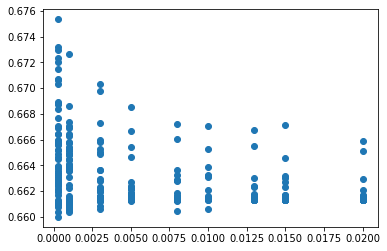

l1_ratio


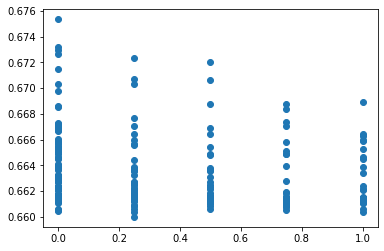

param_degree


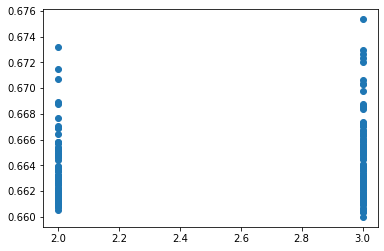

param_interaction_only


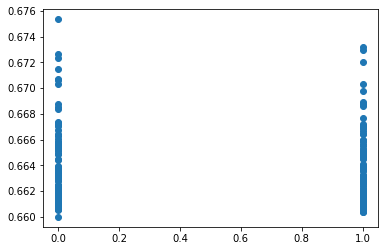

{'alpha': array([0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
        0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
        0.0003, 0.0003, 0.0003, 0.0003, 0.001 , 0.001 , 0.001 , 0.001 ,
        0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
        0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
        0.003 , 0.003 , 0.003 , 0.003 , 0.003 , 0.003 , 0.003 , 0.003 ,
        0.003 , 0.003 , 0.003 , 0.003 , 0.003 , 0.003 , 0.003 , 0.003 ,
        0.003 , 0.003 , 0.003 , 0.003 , 0.005 , 0.005 , 0.005 , 0.005 ,
        0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 ,
        0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 ,
        0.008 , 0.008 , 0.008 , 0.008 , 0.008 , 0.008 , 0.008 , 0.008 ,
        0.008 , 0.008 , 0.008 , 0.008 , 0.008 , 0.008 , 0.008 , 0.008 ,
        0.008 , 0.008 , 0.008 , 0.008 , 0.01  , 0.01  , 0.01  , 0.01  ,
        0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  ,

In [18]:
param_dict = {}
for key, value in grid_results.items():
    if 'param_clf__' in key:
        name = key.replace('param_clf__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()
    elif 'poly__' in key:
        name = key.replace('poly__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()

param_dict

In [19]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.661342 using {'clf__alpha': 0.0003, 'clf__l1_ratio': 0, 'poly__degree': 2, 'poly__interaction_only': True}


In [9]:
fitted_model.cv_results_

{'iter': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [10]:
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
# alphas = np.ma.getdata(grid_results['param_clf__alpha'])
# rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
# dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

KeyError: 'param_clf__learning_rate'

In [11]:
log_rates =np.log(rates)

NameError: name 'rates' is not defined

In [12]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

NameError: name 'log_rates' is not defined

In [13]:
df.columns = ['log_rates', 'dims', 'auc']

NameError: name 'df' is not defined

NameError: name 'df' is not defined

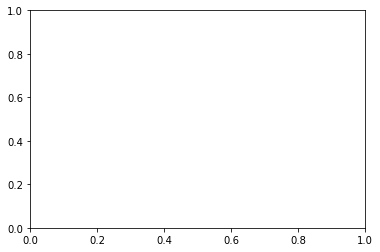

In [14]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

In [15]:
alphas = np.array(alphas, dtype=np.float)
log_alphas =np.log(alphas)
plt.scatter(log_alphas, AUC)

NameError: name 'alphas' is not defined

In [16]:
plt.scatter(log_rates, AUC)

NameError: name 'log_rates' is not defined

In [17]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined